In [101]:
import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from functools import reduce
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [7]:
gunVio2023 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2023.csv")
gunVio2023['year'] = 2023
gunVio2022 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2022.csv")
gunVio2022['year'] = 2022
gunVio2021 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2021.csv")
gunVio2021['year'] = 2021
gunVio2020 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2020.csv")
gunVio2020['year'] = 2020
gunVio2019 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2019.csv")
gunVio2019['year'] = 2019
gunVio2018 = pd.read_csv(os.path.dirname(os.getcwd())+"\dataset\gun violence 2018.csv")
gunVio2018['year'] = 2018

In [8]:
gunVio2018

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year
0,1288201,"December 30, 2018",Texas,Houston,15491 Wallisville Rd,1,1,0,0,2,NaN,2018
1,1288224,"December 30, 2018",North Carolina,Randleman,1029 High Point St,1,0,0,0,0,NaN,2018
2,1288918,"December 30, 2018",California,Madera,20000 block of Avenue 6,1,0,0,0,0,NaN,2018
3,1287553,"December 29, 2018",Texas,Fort Worth,1500 block of E Berry St,1,0,0,0,0,NaN,2018
4,1289168,"December 29, 2018",Indiana,Marion,2300 block of Gallatin St,0,3,0,0,2,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
618,1019174,"January 1, 2018",North Carolina,Charlotte,2305 Farmer St,2,0,0,0,0,NaN,2018
619,1018466,"January 1, 2018",California,Los Angeles,Baring Cross and W 88th St,1,0,0,0,0,NaN,2018
620,1018902,"January 1, 2018",Alabama,Bessemer (Concord),6400 block of William Dr,0,1,0,0,0,NaN,2018
621,1019515,"January 1, 2018",Michigan,Flint,5501 Granville Ave,0,1,0,0,0,NaN,2018


In [9]:
frames = [gunVio2018,
          gunVio2019,
          gunVio2020,
          gunVio2021,
          gunVio2022,
          gunVio2023]

mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
mergedDataset

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9892\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9892\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9892\1518385850.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mergedDataset = reduce(lambda top, bottom: top.append(bottom, ignore_index=True), frames)
C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9892\1518385850.py:8: FutureWarning: The frame.append m

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group
0,1288201.0,"December 30, 2018",Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN
1,1288224.0,"December 30, 2018",North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
2,1288918.0,"December 30, 2018",California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
3,1287553.0,"December 29, 2018",Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN
4,1289168.0,"December 29, 2018",Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2492601.0,"January 1, 2023",Illinois,Chicago,300 block of E 57th St,3.0,1.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4349,2497601.0,"January 1, 2023",Florida,Miami Gardens,NW 171st St and NW 30th Ave,9.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4350,2492611.0,"January 1, 2023",North Carolina,Durham,1000 N Miami Blvd,5.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN
4351,2493102.0,"January 1, 2023",Pennsylvania,Allentown,1140 E Clair St,4.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN


In [10]:
mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Incident ID                   2915 non-null   float64
 1   Incident Date                 4353 non-null   object 
 2   State                         4353 non-null   object 
 3   City Or County                4353 non-null   object 
 4   Address                       4273 non-null   object 
 5   # Victims Injured             2915 non-null   float64
 6   # Victims Killed              2915 non-null   float64
 7   # Subjects-Suspects Injured   2915 non-null   float64
 8   # Subjects-Suspects Killed    2915 non-null   float64
 9   # Subjects-Suspects Arrested  2915 non-null   float64
 10  Operations                    0 non-null      float64
 11  year                          4353 non-null   int64  
 12  Participant Gender            1402 non-null   object 
 13  Par

In [11]:
mergedDataset['Incident Date'] = pd.to_datetime(mergedDataset['Incident Date'])

for column in mergedDataset.columns:
    if mergedDataset[column].dtype == 'object':
        mergedDataset[column] = mergedDataset[column].astype('category')

mergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Incident ID                   2915 non-null   float64       
 1   Incident Date                 4353 non-null   datetime64[ns]
 2   State                         4353 non-null   category      
 3   City Or County                4353 non-null   category      
 4   Address                       4273 non-null   category      
 5   # Victims Injured             2915 non-null   float64       
 6   # Victims Killed              2915 non-null   float64       
 7   # Subjects-Suspects Injured   2915 non-null   float64       
 8   # Subjects-Suspects Killed    2915 non-null   float64       
 9   # Subjects-Suspects Arrested  2915 non-null   float64       
 10  Operations                    0 non-null      float64       
 11  year                          

In [12]:
mergedDataset['# Casualties'] = mergedDataset['# Subjects-Suspects Injured'] + \
                                mergedDataset['# Subjects-Suspects Killed'] + \
                                mergedDataset['# Victims Injured'] + \
                                mergedDataset['# Victims Killed']
mergedDataset

,Incident ID,Incident Date,State,City Or County,Address,# Victims Injured,# Victims Killed,# Subjects-Suspects Injured,# Subjects-Suspects Killed,# Subjects-Suspects Arrested,Operations,year,Participant Gender,Participant Name,Participant Age Group,# Casualties
0,1288201.0,2018-12-30,Texas,Houston,15491 Wallisville Rd,1.0,1.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,2.0
1,1288224.0,2018-12-30,North Carolina,Randleman,1029 High Point St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
2,1288918.0,2018-12-30,California,Madera,20000 block of Avenue 6,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
3,1287553.0,2018-12-29,Texas,Fort Worth,1500 block of E Berry St,1.0,0.0,0.0,0.0,0.0,NaN,2018,NaN,NaN,NaN,1.0
4,1289168.0,2018-12-29,Indiana,Marion,2300 block of Gallatin St,0.0,3.0,0.0,0.0,2.0,NaN,2018,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2492601.0,2023-01-01,Illinois,Chicago,300 block of E 57th St,3.0,1.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0
4349,2497601.0,2023-01-01,Florida,Miami Gardens,NW 171st St and NW 30th Ave,9.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,9.0
4350,2492611.0,2023-01-01,North Carolina,Durham,1000 N Miami Blvd,5.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,5.0
4351,2493102.0,2023-01-01,Pennsylvania,Allentown,1140 E Clair St,4.0,0.0,0.0,0.0,0.0,NaN,2023,NaN,NaN,NaN,4.0


<Axes: xlabel='year', ylabel='count'>

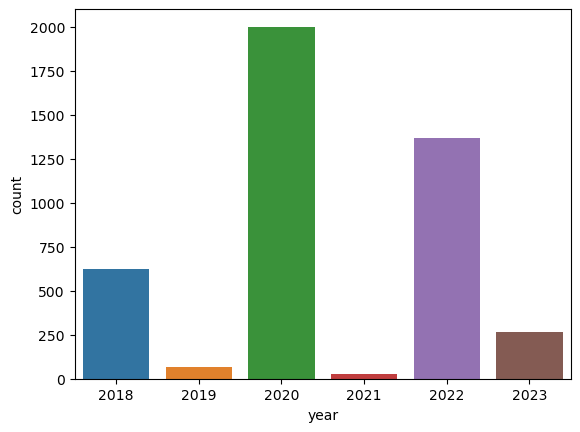

In [13]:
sns.countplot(mergedDataset, x='year')

C:\Users\Dozie Sixtus\AppData\Local\Temp\ipykernel_9892\2820743737.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(mergedDataset.groupby(['year']).sum().reset_index(), x='year', y='# Casualties')


<Axes: xlabel='year', ylabel='# Casualties'>

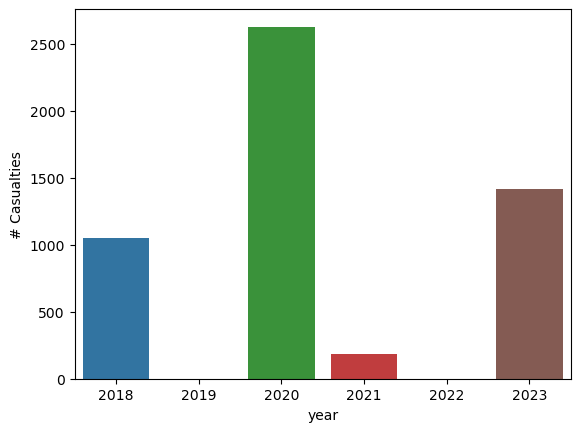

In [14]:
sns.barplot(mergedDataset.groupby(['year']).sum().reset_index(), x='year', y='# Casualties')

In [15]:
mergedDataset[mergedDataset['year']==2022].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 2719 to 4088
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Incident ID                   0 non-null      float64       
 1   Incident Date                 1370 non-null   datetime64[ns]
 2   State                         1370 non-null   category      
 3   City Or County                1370 non-null   category      
 4   Address                       1343 non-null   category      
 5   # Victims Injured             0 non-null      float64       
 6   # Victims Killed              0 non-null      float64       
 7   # Subjects-Suspects Injured   0 non-null      float64       
 8   # Subjects-Suspects Killed    0 non-null      float64       
 9   # Subjects-Suspects Arrested  0 non-null      float64       
 10  Operations                    0 non-null      float64       
 11  year                       

In [106]:
def decodeLongLat(county):
    # Initialize Nominatim API
    geolocator = Nominatim(user_agent="MyApp")

    try:
        location = geolocator.geocode(str(county))
        return location.latitude, location.longitude
    except AttributeError:
        pass
    
    if len(county.split())>2:
        start = 2
    else:
        start = 1
    for counter in range(start,len(county.split())):
        dumCounty = ''.join(county.split()[:counter])
        try: 
            print(dumCounty)
            location = geolocator.geocode(str(dumCounty))
            return location.latitude, location.longitude
        except:
            pass
        
latLo = [decodeLongLat(x) for x in tqdm(mergedDataset['City Or County'].unique())]
latLo

 33%|███▎      | 456/1372 [03:42<07:39,  1.99it/s]

Swainsboro


100%|██████████| 1372/1372 [10:57<00:00,  2.09it/s]


[(29.7589382, -95.3676974),
 (35.8179143, -79.8030873),
 (37.1716264, -119.7737991),
 (32.753177, -97.3327459),
 (32.7931661, -94.344488),
 (33.7489924, -84.3902644),
 (38.783855, -90.481677),
 (39.1014537, -84.5124602),
 (30.3321838, -81.655651),
 (39.9805509, -94.5944045),
 (36.1622767, -86.7742984),
 (34.7465071, -92.2896267),
 (26.8200607, -80.6653351),
 (32.4707862, -93.7559378),
 (35.1460249, -90.0517638),
 (32.9635006, -81.3400056),
 (32.3086744, -90.1983063),
 (41.2222218, -73.0570603),
 (31.098207, -97.3427847),
 (27.9484265, -82.23621545220522),
 (35.2272086, -80.8430827),
 (25.4718946, -80.4759905),
 (38.7919683, -90.3227803),
 (36.7295295, -119.70886126075588),
 (38.7521235, -121.2880059),
 (32.0790074, -81.0921335),
 (30.4494155, -91.1869659),
 (52.4796992, -1.9026911),
 (36.1563122, -95.9927516),
 (37.7790262, -122.419906),
 (38.6280278, -90.1910154),
 (33.456207, -102.489357),
 (36.0600602, -86.6722192),
 (35.5283506, -108.743907),
 (42.3315509, -83.0466403),
 (29.785785

In [110]:
location = pd.DataFrame(latLo, 
                        columns=['Latitude','Longitude'])
location['cord'] = mergedDataset['City Or County'].unique()
location

,Latitude,Longitude,cord
0,29.758938,-95.367697,Houston
1,35.817914,-79.803087,Randleman
2,37.171626,-119.773799,Madera
3,32.753177,-97.332746,Fort Worth
4,32.793166,-94.344488,Marion
...,...,...,...
1367,52.347214,-114.176630,Half Moon Bay
1368,34.051522,-118.129807,Monterey Park
1369,38.746995,-90.240112,Saint Louis (Moline Acres)
1370,37.702390,-113.084910,Cedar City (Enoch)


In [111]:
location.to_csv(os.getcwd()+'\location.csv')